<a href="https://colab.research.google.com/github/TanyaKumari0204/Machine-Learning-Projects/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gold price data->data preprocessing->Data analysis->Train test split->Random forest regessor->trained model->predict price of gold

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_dataset=pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
gold_dataset.shape

(2290, 6)

In [6]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_dataset.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [17]:
X=gold_dataset.drop(['GLD','Date'],axis=1)
Y=gold_dataset['GLD']
gold_dataset['Date'] = pd.to_datetime(gold_dataset['Date'])#to change from string


In [11]:
correlation=gold_dataset.corr()

<Axes: >

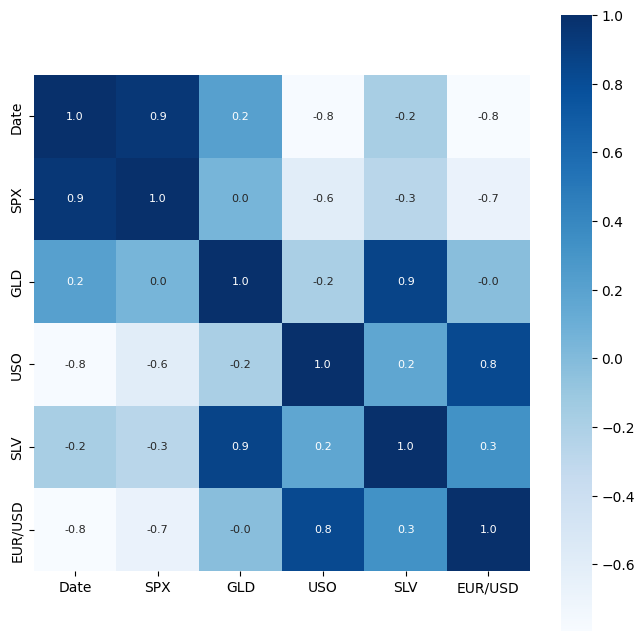

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [13]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-2255971821.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

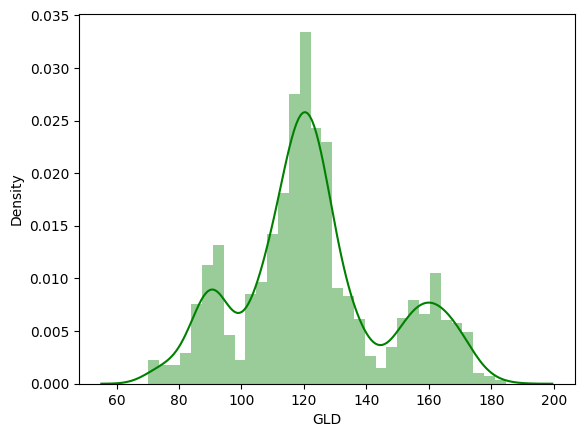

In [16]:
#distribution of gold price
sns.distplot(gold_dataset['GLD'],color='green')

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [27]:
X_train.shape,X_test.shape,X.shape

((1832, 4), (458, 4), (2290, 4))

In [30]:
regressor=RandomForestRegressor(n_estimators=100)

In [31]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [32]:
training_data_prediction=regressor.predict(X_train)


In [34]:
error=metrics.r2_score(Y_train,training_data_prediction)

In [35]:
print(error)

0.9984272815780082


In [36]:
testing_data_prediction=regressor.predict(X_test)


In [38]:
error1=metrics.r2_score(Y_test,testing_data_prediction)

In [39]:
print(error1)

0.9902402878223503


In [40]:
Y_test=list(Y_test)


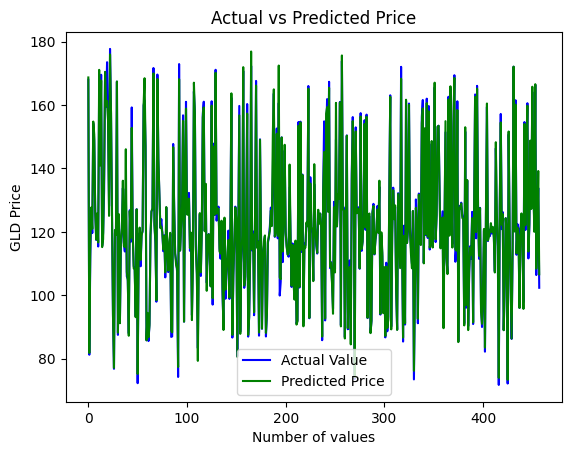

In [44]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(testing_data_prediction,color='green',label="Predicted Price")
plt.title("Actual vs Predicted Price")
plt.xlabel("Number of values")
plt.ylabel('GLD Price')
plt.legend()
plt.show()